# PyTorch Getting Started Tutorial

This tutorial from [PyTorch](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) shows basic functionality of PyTorch related to data loaders, NN-models and training of NN-models. The tutorial shows how to use following concepts:

* model.train()
  * train() tells the model that it is in training mode
* model.eval()
  * eval() tells the model that it is in inference mode
* torch.no_grad()

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import itertools

In [2]:
# Domainspecific libraries TorchText, TorchVision and TorchAudio include datasets.

# Download training data from opendatasets
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

In [3]:
BATCH_SIZE = 64

train_dataloader = DataLoader(training_data, batch_size = BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [4]:
# Set device to "cuda" is available, otherwise "mps" and fallback on "cpu" is nothing else is available
# cuda -> cuda
# mps -> Metal Performance Shaders on GPU for MacOS devices with Metal programming framework
# cpu -> cpu
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Device: {device}")

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Device: cuda
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
# Optimizing the parameters
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Training function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    # The train()-function tells the model that we are training the model. This informs
    # layers such as Dropout and Batchnorm, which are designed to behave differently during
    # training and evaluation.
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

# Testing function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    # The eval()-function tells the model that it is being used for inference.
    model.eval()
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test error: \n Accuracy: {(100*correct):>0.1f}%, avg loss:: {test_loss:>8f}\n")

In [6]:
# Train for 5 epochs
EPOCHS = 5

for t in range(EPOCHS):
    print(f"Epoch {t+1}\n")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1

loss: 2.306638 [   64/60000]
loss: 2.286437 [ 6464/60000]
loss: 2.264489 [12864/60000]
loss: 2.256693 [19264/60000]
loss: 2.244888 [25664/60000]
loss: 2.218241 [32064/60000]
loss: 2.223208 [38464/60000]
loss: 2.183665 [44864/60000]
loss: 2.177569 [51264/60000]
loss: 2.154699 [57664/60000]
Test error: 
 Accuracy: 45.6%, avg loss:: 2.137855

Epoch 2

loss: 2.145057 [   64/60000]
loss: 2.130251 [ 6464/60000]
loss: 2.061409 [12864/60000]
loss: 2.082825 [19264/60000]
loss: 2.030161 [25664/60000]
loss: 1.967131 [32064/60000]
loss: 1.997380 [38464/60000]
loss: 1.903086 [44864/60000]
loss: 1.906753 [51264/60000]
loss: 1.844940 [57664/60000]
Test error: 
 Accuracy: 58.9%, avg loss:: 1.833279

Epoch 3

loss: 1.863599 [   64/60000]
loss: 1.830390 [ 6464/60000]
loss: 1.702945 [12864/60000]
loss: 1.753121 [19264/60000]
loss: 1.639766 [25664/60000]
loss: 1.603336 [32064/60000]
loss: 1.623403 [38464/60000]
loss: 1.524527 [44864/60000]
loss: 1.552864 [51264/60000]
loss: 1.456600 [57664/60000]

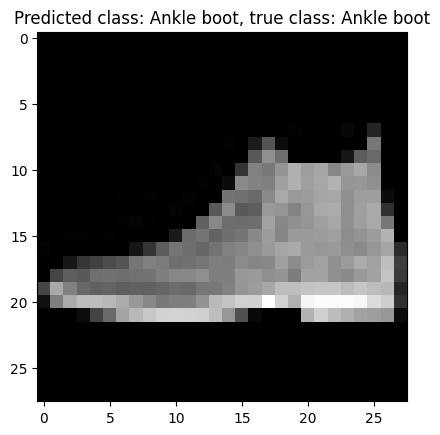

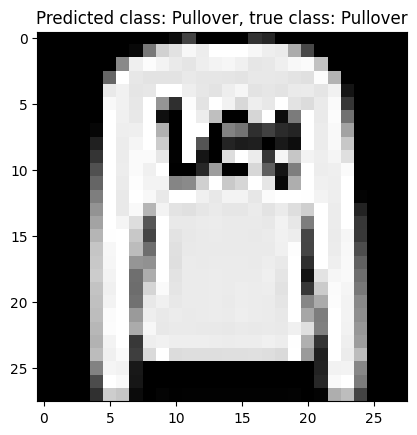

In [7]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# Iterate over 2 samples from the test data and show prediction results.
# no_grad(): disabling gradient calculation is useful for inference as it reduces memory consumption
model.eval()
with torch.no_grad():
    for image, label in itertools.islice(test_data, 2):
        class_gt = label

        # Returns a new tensor, in numpy-format, from the graph
        # detach() -> returns a tensor, detached from the graph
        # cpu() -> returns a copy of the tensor in CPU memory
        # numpy() -> converts tensor to numpy
        # argmax() -> returns index to the maximum value
        class_pred = model(image.to(device)).detach().cpu().numpy().argmax()

        plt.imshow(image.squeeze(), cmap="gray")
        plt.title(f"Predicted class: {classes[class_pred]}, true class: {classes[class_gt]}")
        plt.show()